In [26]:
# http://scikit-learn.org/dev/auto_examples/neighbors/plot_lof.html
# ToDo: different metrics  
    
    
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


Automatically created module for IPython interactive environment


In [6]:
import pandas as pd
df = pd.read_csv("outlier_dataset.csv", sep=' ', header=None)
df.dtypes
df.head()

,0,1
0,0.412560,0.582276
1,0.379856,0.507856
2,0.379528,0.512318
3,0.642490,0.681989
4,0.462998,0.327923


In [7]:
X = df.as_matrix()
X[:, 1].max()

0.89379514557200002

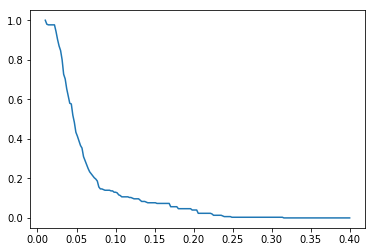

In [27]:
from sklearn.metrics import *
from sklearn.cluster import DBSCAN

xx = np.linspace(0.01, 0.4, 200)
yy = list()
for eps in xx:
    dbscan = DBSCAN(eps, min_samples=5, metric='euclidean')
    dbscan.fit(X)
    labels = dbscan.labels_
    yy.append(float(len([1 for i in labels if i == -1])) / len(X))
plt.plot(xx, yy)
plt.show()

In [28]:
my_eps = min( [ xx[i] for i in range(len(xx)) if yy[i]<0.05 ] )
my_eps

0.1805025125628141

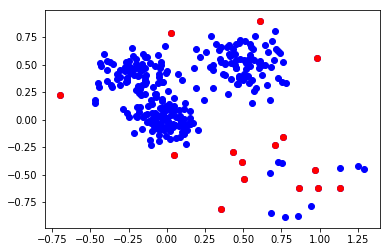

In [23]:
dbscan = DBSCAN(my_eps, min_samples=3, metric='euclidean')
dbscan.fit(X)
labels = dbscan.labels_
normal = np.array([ X[i] for i in range(len(X)) if labels[i]!=-1])
noise = np.array([ X[i] for i in range(len(X)) if labels[i]==-1])

plt.xlim(min(X[:,0]-0.1), max(X[:,0])+0.1)
plt.ylim(min(X[:,1]-0.1), max(X[:,1])+0.1)

plt.plot(X[:,0], X[:,1], 'bo')
plt.plot(noise[:,0], noise[:,1], 'ro')
plt.show()

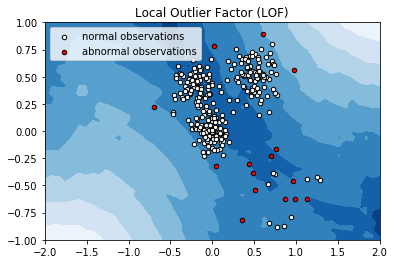

In [29]:
# plot the level sets of the decision function
plt.close('all')
xx, yy = np.meshgrid(np.linspace(-2, 2, 50), np.linspace(-1, 1, 50))
Z = clf._decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Local Outlier Factor (LOF)")
plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

a = plt.scatter(normal[:, 0], normal[:, 1], c='white',
                edgecolor='k', s=20)
b = plt.scatter(noise[:, 0], noise[:, 1], c='red',
                edgecolor='k', s=20)
plt.axis('tight')
plt.xlim((-2, 2))
plt.ylim((-1, 1))
plt.legend([a, b],
           ["normal observations",
            "abnormal observations"],
           loc="upper left")
plt.show()